In [1]:
from AG_simple import AlgoritmoGenetico
from sumolib import checkBinary
import xml.etree.ElementTree as ET
import traci
import sys

from statistics import mean, stdev
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def simulate(program):
    traci.start([checkBinary(program), "-c", "sumo/light.sumocfg", "--tripinfo-output", "sumo/tripinfo.xml"])
    
    while traci.simulation.getMinExpectedNumber() > 0:
        traci.simulationStep()
        
    traci.close()
    sys.stdout.flush()
    
    xmldoc = ET.parse('sumo/tripinfo.xml')

    tripinfos = xmldoc.findall('tripinfo')

    waitingTime = 0
    for tripinfo in tripinfos:
        waitingTime += float(tripinfo.get('waitingTime'))
        
    return waitingTime

In [3]:
def display(fenotipo):
    red = ET.parse('sumo/light.net.xml')
    signal = red.find('tlLogic')
    fases = signal.findall('phase')
    
    for i in range(4):
        fases[i].set("duration", str(fenotipo[2*i]))
        fases[i].set("state", fenotipo[2*i+1])

    red.write("sumo/light.net.xml")

    return simulate('sumo-gui')

In [4]:
prueba = [30, 'GGGGgrrrrrGGGGgrrrrr', 5, 'yyyyyrrrrryyyyyrrrrr', 30, 'rrrrrGGGGgrrrrrGGGGg', 5, 'rrrrryyyyyrrrrryyyyy']
display(prueba)

322.79999999999995

In [5]:
data = [0] * 188
ga = AlgoritmoGenetico(data)
ga.generations =  20
ga.population_size = 50
ga.crossover_probability = 0.9
ga.mutation_probability = 1/188
fitnesses = []

In [6]:
def fenotipo(genotipo):
    
    fenotipo = []
    m = ['G', 'g', 'y', 'r']
    
    for j in range(4):
        fenotipo.append(int(''.join(map(str,genotipo[:7])),2)) 

        state = genotipo[7:47]
        s = ""
        for i in range(0, 20):
            s += m[int(str(state[2*i])+str(state[2*i+1]),2)]
        fenotipo.append(s)

        genotipo = genotipo[47:]
    
    return fenotipo

In [7]:
def fitness(individual, data):
    
    individual = fenotipo(individual)

    red = ET.parse('sumo/light.net.xml')
    signal = red.find('tlLogic') 
    
    i = 0
    for phase in signal.iter('phase'):
        duration = str(individual[2*i])
        if duration == "0":
             return 0
        state = individual[2*i+1]
        phase.set("duration", duration)
        phase.set("state", state)
        i += 1

    red.write("sumo/light.net.xml")
    
    waitingTime = simulate('sumo')
    
    fitnesses.append(waitingTime)
          
    print(waitingTime, individual)
    
    return 1/waitingTime

ga.fitness_function = fitness

In [8]:
ga.run()

1224.1000000000001 [25, 'GygygrygGygGgggGyGGy', 13, 'GrGgGggyygyGGrGgrrGy', 112, 'yGygrGyygryyGyyrGryg', 11, 'GrgGgyGGGygyGrGGrGGg']
1498.1000000000001 [103, 'ryGGGgrGyGygyGrrGgyr', 123, 'ggryggggGyyGrGgyyyGg', 59, 'ygGrGGGgyrgGgyGGgyry', 83, 'GGGrgrgrygggrgyryyGG']
394.2 [109, 'GygyyyygGGgygggyGygG', 18, 'GrrgggyGgGGygggggrry', 38, 'rygygryGGyrrgrgGryyr', 56, 'GryGgGgryyyGgGrygrgr']
766.5 [3, 'yGGGrGgggGrGygryyyrr', 83, 'GGGyGygyrggyGyGGGygG', 14, 'rGgrGrggyGygrGGGgggG', 62, 'GGgGGGGGygGGyGrgrrgr']
1501.8999999999999 [10, 'yGgGGggGygGyyGrrgrGr', 118, 'rggGGryGrrgGrryGGrry', 118, 'yyygyryryrrGggGyrGGy', 78, 'GrgGrrgGGggyGrgrGrgr']
1934.8 [12, 'GgGrygryrrrGyGgGyyGy', 117, 'grygyGGryyGrygGGygrG', 40, 'ygGrgyyGyyyrGryyGrGy', 71, 'ygrgrGrGgggggyGgggyy']
6305.9 [3, 'yrGgGyryrGgrygGGgyyy', 108, 'yyrGyyrGyrygyryrrygG', 39, 'GrrgrrgyrGgyGryyGrGr', 123, 'GGGrgGyGGGgyGgryGyyy']
887.8 [25, 'ygGgggGGrrGrGgGyGyyy', 14, 'yGgyyygrygggGryrgGrg', 79, 'grGyrrgryGGGgrgryggy', 125, 'yGgGGrGGggGGGgGgryyg']

In [ ]:
best = fenotipo(ga.best_individual()[1])

[18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2]
[2100.308, 430.09, 24.677999999999997, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2]
[1577.778075344164, 391.93296399423474, 32.05778768131712, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


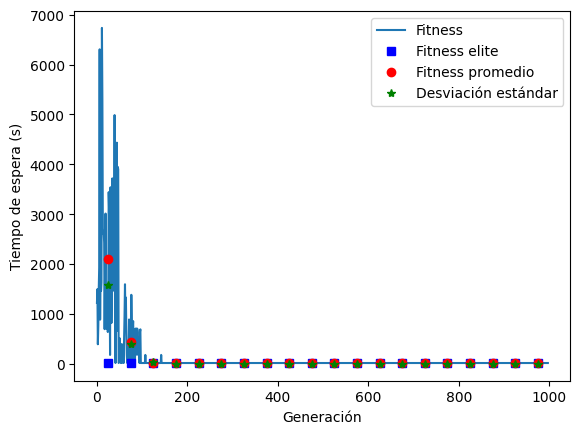

In [13]:
fit_generacion = []
fit_elite = []
fit_promedio = []
fit_desviacion = []

for i in range(ga.generations):
    fit_generacion.append(fitnesses[ga.population_size*i:(ga.population_size)*(i+1)])

for i in range(ga.generations):
    fit_elite.append(min(fit_generacion[i]))
    fit_promedio.append(mean(fit_generacion[i]))
    fit_desviacion.append(stdev(fit_generacion[i]))
    
print(fit_elite)
print(fit_promedio)
print(fit_desviacion)


plt.plot(fitnesses, label='Fitness')
t = np.linspace(ga.population_size/2, (ga.population_size/2)*(2*ga.generations-1), ga.generations)
plt.plot(t, fit_elite,'bs', label='Fitness elite')
plt.plot(t, fit_promedio, 'ro', label='Fitness promedio')
plt.plot(t, fit_desviacion, 'g*', label='Desviación estándar')

plt.xlabel('Generación')
plt.ylabel('Tiempo de espera (s)')
plt.legend()
plt.show()

In [14]:
# Best individual, after 10 generations each with a population of 20 individuals
display(best)

18.2

In [12]:
# Best so far, after 30 generations each with a population of 50 individuals
best_so_far = [43, 'GGGrGgrGrgGGyyGGgGyy', 11, 'GgyGGyGyrgggrGGGGGrr', 38, 'GgGGgGrgyyGGgyygGryr', 78, 'yrrGgryyrrgGyGrGyggG']
display(best_so_far)

4.199999999999999

In [16]:
prueba = [30, 'GGGGgrrrrrGGGGgrrrrr', 5, 'yyyyyrrrrryyyyyrrrrr', 30, 'rrrrrGGGGgrrrrrGGGGg', 5, 'rrrrryyyyyrrrrryyyyy']
display(prueba)

322.79999999999995